# Lab 5. Fuzzy Systems
This lab sheet aims to help us understand more about fuzzy systems, as we are going to study this new concept and use it to solve 3 problems, which will be divided into the following tasks:
1. The tipping problem
2. The project risk assessment problem
3. The washing machine fuzzy controller problem

## Task 5.1 The Tipping Problem
###Problem Description

This first task presents us with a tipping problem, which is meant to recommend how much to tip for a food service, in this case, in a restaurant as well as its service quality.

This problem is actually an example very much based on the scikit-fuzzy package (which we will mention in the discussions of this task).

First of all, we need to define the problem in terms of its food and service quality. We are going to have 3 different linguistic variables:
1. The food, which will have "poor", "average" and "good" as linguistic values.
2. The service, which will have "poor", "average" and "good" as linguistic values.
3. The tip, which will have "low", "medium" and "high" as linguistic values.

Note that the food and the service will serve as inputs, while the tip will be an output.

We can see the memberships (in which all present the same behaviour) of the linguistic values represented in the figure, or in other words, the fuzzy sets:

![Figure 1](https://github.com/LeomPina/AIreports/blob/main/Captura%20de%20ecr%C3%A3%202023-10-23%20011830.png?raw=true)

Figure 1

Let's now see the rules that we will use throughout this task:
1. IF the service was poor
   OR the food quality was poor
   THEN the tip will be low
2. IF the service was average
   THEN the tip will be medium
3. IF the service was good
   OR the food quality was good
   THEN the tip will be high

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=9b8d6afd09a7965caffa84a74b8fbec1e5fe37997147d8564f0b68c372a573dc
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership functions
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
food.automf(3)
service.automf(3)
tip.automf(3, names=['low', 'medium', 'high'])

# food.view()
# service.view()
# tip.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(food['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

# Create the control system and its simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Suggested tip: 19.76409495548962 %


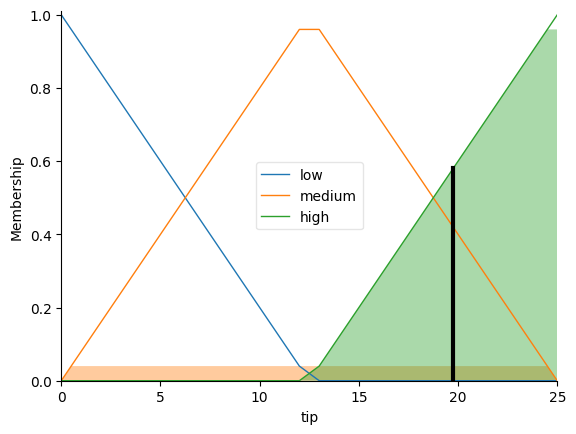

In [ ]:
# Pass inputs to the ControlSystem
tipping.inputs({'food': 6.5, 'service': 9.8})

# Crunch the numbers
tipping.compute()
print("Suggested tip:", tipping.output['tip'], "%")
tip.view(sim=tipping)


## Discussions
To solve this problem, the scikit-fuzzy package was used, as it is a popular fuzzy logic library and provides lots of important tools that were useful in this lab, such as lots of common fuzzy logic
methods. The online
documentation can be found at https://pythonhosted.org/scikit-fuzzy/.

The project github page can also be found at https://github.com/scikit-fuzzy/scikit-fuzzy.

For this problem, in order to compute and calculate the tip, as inputs we used the food with a rating of 6.5 and the service quality with a rating of 9.8. Therefore, we can say that, in this case, we used a considerable "average" range of food as well as a mostly "good" range of service.
The program outputted a value result of approximately 19.764%, given the previous inputted values. Note that the suggested tip can only go up to 25%.

In the following figure, we can see a plot regarding the tip, and relative to the fuzzy system computed when running the program.

![Figure 2](https://github.com/LeomPina/AIreports/blob/main/w6plot5.1.png?raw=true)

Figure 2

By analysing the results, we can conclude that the suggested tip is approximately 19.764% this being a "medium" to "high" range tip, which demonstrates how we can use fuzzy logic and its applications when it comes to complex decision-making, instead of just using a simple binary decision, such as a "yes" or "no" decision label.

## Task 5.2 Project Risk Assessment
###Problem Description

This next task presents a project risk assessment problem, in which we will assess and evaluate the risk related to the making of a certain project.

We now need to define the problem in terms of its linguistic variables. We will have 3 different linguistic variables:
1. The funding, which will have "inadequate", "marginal" and "adequate" as linguistic values.
2. The staffing, which will have "small" and "large" as linguistic values.
3. The risk, which will have "low", "normal" and "high" as linguistic values.

Note that the funding and the staffing will serve as inputs, while the risk will be an output.

The following figure shows us the memberships (and their behaviours) of the linguistic values previously mentioned, or in other words, the fuzzy sets:

![Figure 3](https://github.com/LeomPina/AIreports/blob/main/gfdssgfd.png?raw=true)

Figure 3

Note that these membership functions (taken from the lecture) are not defined exactly the same as the ones we are going to use in our solution.

Let's now look at the rules that we will use throughout this task:
1. IF project_funding is adequate<br>
   OR project_staffing is small<br>
   THEN risk is low<br>
2. IF project_funding is marginal<br>
   AND project_staffing is large<br>
   THEN risk is normal<br>
3. IF project_funding is inadequate<br>
   THEN risk is high

So overall, for this problem we now have that:

Fuzzy system:<br>
Inputs: project_funding (x), project_staffing (y)<br>
Output: risk (z)<br>
Three rules:<br>
Rule: 1 <br>
> IF x is A3 <br>
  OR y is B1 <br>
  THEN z is C1<br>

Rule: 2<br>
> IF x is A2<br>
  AND y is B2<br>
  THEN z is C2<br>

Rule: 3<br>
> IF x is A1<br>
  THEN z is C3

##Implementation and results
This section shows the implemented code and its respective output.

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=9894b7437e7a542121d4207abf32f1b7fa2dfde0fc698619aa3df975c9634e4d
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


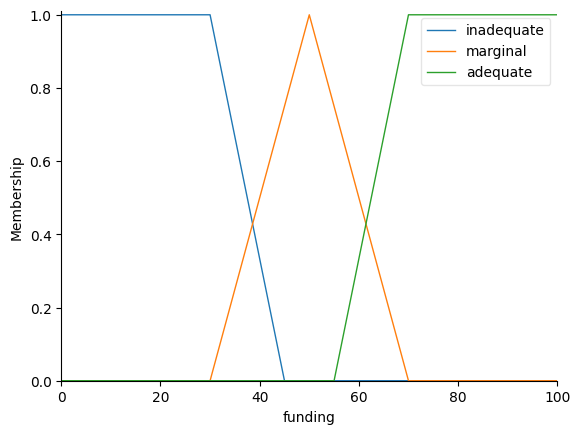

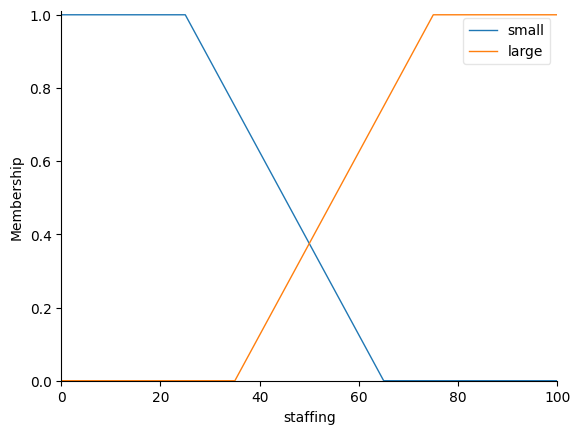

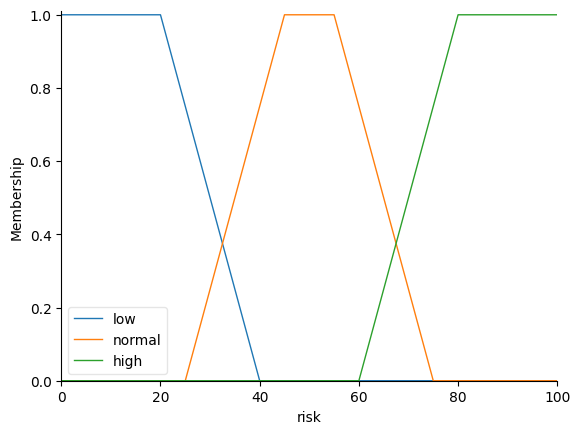

In [ ]:
# Linguistic variables for antecedents/consequent
funding = ctrl.Antecedent(np.arange(0, 101, 1), 'funding')
staffing = ctrl.Antecedent(np.arange(0, 101, 1), 'staffing')
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')

# membership functions for each linguistic values
funding['inadequate'] = fuzz.trapmf(funding.universe, [0, 0, 30, 45])
funding['marginal'] = fuzz.trimf(funding.universe, [30, 50, 70])
funding['adequate'] = fuzz.trapmf(funding.universe, [55, 70, 100, 100])
staffing['small'] = fuzz.trapmf(staffing.universe, [0, 0, 25, 65])
staffing['large'] = fuzz.trapmf(staffing.universe, [35, 75, 100, 100])
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['normal'] = fuzz.trapmf(risk.universe, [25, 45, 55, 75])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

funding.view()
staffing.view()
risk.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(funding['adequate'] | staffing['small'], risk['low'])
rule2 = ctrl.Rule(funding['marginal'] & staffing['large'], risk['normal'])
rule3 = ctrl.Rule(funding['inadequate'], risk['high'])
rule4 = ctrl.Rule(funding['inadequate'] & staffing['large'], risk['high'])

# Create the control system and its simulation
#ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3])
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Project risk: 66.66529281135837 %


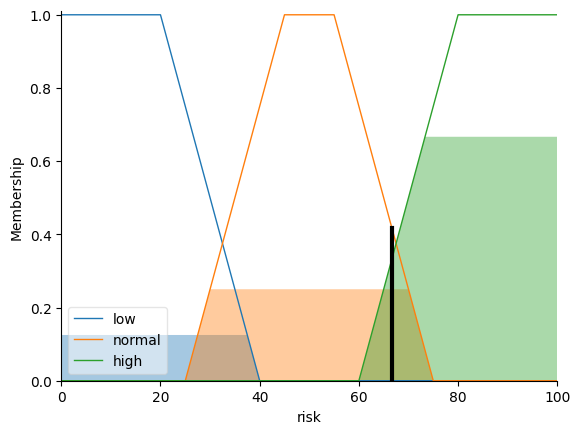

In [ ]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'funding': 35, 'staffing': 60})

# Crunch the numbers
ctrl_sim.compute()
print("Project risk:", ctrl_sim.output['risk'], "%")
risk.view(sim=ctrl_sim)


## Discussions
To find a solution to this problem, again, the scikit-fuzzy package was used.

For this problem, when talking about the inputs, we used a funding rating of 35 and a staffing rating of 60. Therefore, we can say that we used a considerable "inadequate" range funding as well as a considerable "large" range staffing.
The program outputted a value result of approximately 66.665%, given the previous inputted values.

In the next 3 figures above, we can see the membership functions for each linguistic value.

![Figure 4](https://github.com/LeomPina/AIreports/blob/main/w6plo5.2.1.png?raw=true)

Figure 4

![Figure 5](https://github.com/LeomPina/AIreports/blob/main/w6plot5.2.2.png?raw=true)

Figure 5

![Figure 6](https://github.com/LeomPina/AIreports/blob/main/w6plot5.2.3.png?raw=true)

Figure 6

We can notice that the plots obtained are fairly similar to the ones we saw in the problem description or the ones we discussed in the lecture (Negnevitsky 2011), although they are not literally the same, as we can infer by our outputted result (of approximately 66.665%) which is different than the one we got in the lecture, which was approximately 67.4%, so it is indeed slightly different.

In the following figure, we can see a plot regarding the risk, and relative to the fuzzy system computed when running the program.

![Figure 7](https://github.com/LeomPina/AIreports/blob/main/w6plot5.2.4.png?raw=true)

Figure 7

By analysing the results, we can conclude that the risk for this project is approximately 66.665%, this being a mostly "normal" to slightly "high" range risk.

Let's now study the results of a different scenario, where the rules of the problem are now different as we add a new rule to the existing ones, while everything else, such as linguistic variables, values, inputs, and outputs continues the same.

Let's see the final rule structure:
1. IF project_funding is adequate<br>
   OR project_staffing is small<br>
   THEN risk is low<br>
2. IF project_funding is marginal<br>
   AND project_staffing is large<br>
   THEN risk is normal<br>
3. IF project_funding is inadequate<br>
   THEN risk is high<br>
4. IF project funding is inadequate<br>
   AND project staffing is large<br>
   THEN risk is high

In the following figure, we can see a plot regarding the risk, and relative to the new fuzzy system computed when running the altered program.

![Figure 8](https://github.com/LeomPina/AIreports/blob/main/w6plot5.2.5.png?raw=true)

Figure 8  

By analising the results, we can notice that these results are equal to the ones obtained before adding rule 4, as the risk calculated is still approximately 66.665% and the fuzzy system plot is also the same as before.

Although in the Mamdani fuzzy inference process when using certain input values each rule will contribute to the final output, in this case, the results revealed themselves as similar, this can be explained by looking at how the Mamdani fuzzy inference process works.

Firstly, in the "fuzzification" step, we take the inputs given and calculate their degree of membership to which they belong regarding the appropriate fuzzy sets.

Secondly, we will check the existing fuzzy Rules, for this particular case, we are going to focus on rules 3 and 4 (these are the same except for one more AND statement) as they both deal with the funding "inadequate" value. At the same time, in this "rule evaluation" for the given inputs, when processing the funding and the staffing values, the funding degree of membership for "Inadequate" is probably lower than the staffing degree of membership for "large", so in rule 4, as we have the AND statement, we will see that the resulting membership function is clipped, in other words, the correlation minimum method will happen and the top of the membership function is sliced, therefore, we will choose the minimum degree level out of these fuzzified inputs (the funding degree of membership for "Inadequate" in this case).

After this, we have the "aggregation", in which we will take all the resulting outputs and combine them into a single fuzzy set. That will be used to calculate the overall risk level.

Finally, in the "defuzzification" we will turn the final result into a crisp number, in other words, a single number.

So as rules 3 and 4 will give us the same result, both scenarios have the same results.

## Task 5.3 Washing Machine Fuzzy Controller
###Problem Description

This last task presents the washing machine fuzzy controller problem, which takes us to a more day-to-day life application, such as a fuzzy controller for washing machines. So for this problem, we will create a fuzzy controller for washing machines.

First, it is necessary to define the problem in terms of its linguistic variables. We will have 3 different linguistic variables:
1. The degree of dirtiness, which will have "SD(small)", "MD(medium)", "LD(large)" as linguistic values.
2. The size of load of clothes, which will have "SL(small)", "ML(medium)", "LL(large)" as linguistic values.
3. The washing time, which will have "VS(very short)", "S(short)", "M(medium)", "L(long)", "VL(very long)" as linguistic values.

Note that the degree of dirtiness and the size of a load of clothes will be the inputs, while the washing time will be the output.

The figure below shows us the memberships (and their behaviour) of the linguistic values previously mentioned, or in other words, the fuzzy sets:

![Figure 9](https://github.com/LeomPina/AIreports/blob/main/w6plot5.3.1.png?raw=true)

Figure 9

Let's now look at the following table and see the rules that we will use throughout this task:

![Figure 10](https://github.com/LeomPina/AIreports/blob/main/w6plot5.3.2.png?raw=true)

###### table 1

The table above displays the rules in a Fuzzy Associative Memory (FAM). As an example of how this translates, the first rule of this FAM is defined as the following:

Rule: 1 <br>
> IF dirtiness is SD <br>
  AND load is SL <br>
  THEN washing time is VS <br>

##Implementation and results
This section shows the implemented code and its respective output.


In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=5fa81c0d23ecef9bd88a503f1a473d465a9680949fc859a2f36b2e4e68d0f96b
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


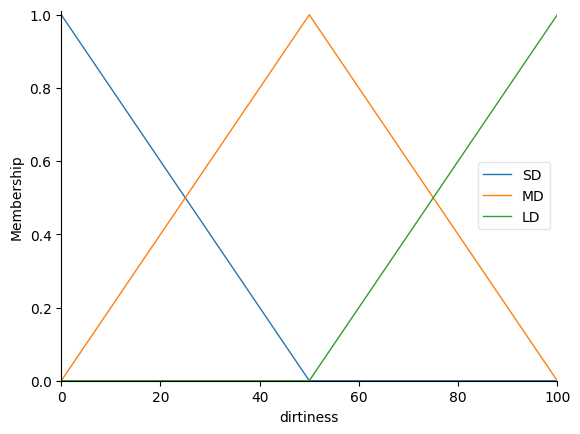

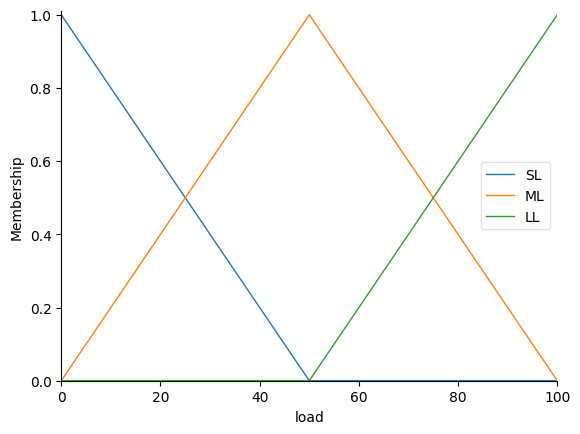

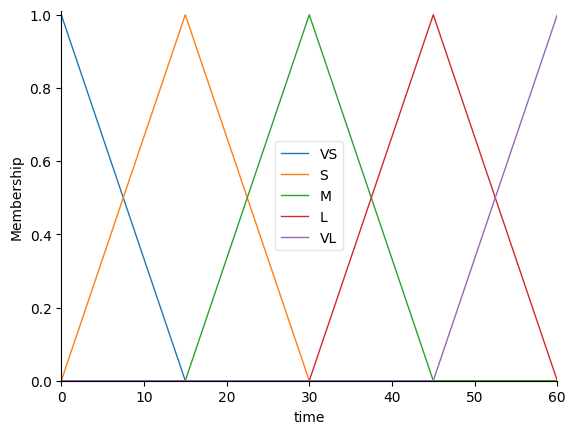

In [ ]:
# Linguistic variables for antecedents/consequent
dirtiness = ctrl.Antecedent(np.arange(0, 101, 1), 'dirtiness')
load = ctrl.Antecedent(np.arange(0, 101, 1), 'load')
time = ctrl.Consequent(np.arange(0, 61, 1), 'time')

# membership functions for each linguistic values
dirtiness.automf(3, names=['SD', 'MD', 'LD'])
load.automf(3, names=['SL', 'ML', 'LL'])
time.automf(5, names=['VS', 'S', 'M', 'L', 'VL'])

dirtiness.view()
load.view()
time.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(dirtiness['SD'] & load['SL'], time['VS'])
rule2 = ctrl.Rule(dirtiness['SD'] & load['ML'], time['M'])
rule3 = ctrl.Rule(dirtiness['SD'] & load['LL'], time['L'])
rule4 = ctrl.Rule(dirtiness['MD'] & load['SL'], time['S'])
rule5 = ctrl.Rule(dirtiness['MD'] & load['ML'], time['M'])
rule6 = ctrl.Rule(dirtiness['MD'] & load['LL'], time['L'])
rule7 = ctrl.Rule(dirtiness['LD'] & load['SL'], time['M'])
rule8 = ctrl.Rule(dirtiness['LD'] & load['ML'], time['L'])
rule9 = ctrl.Rule(dirtiness['LD'] & load['LL'], time['VL'])

# Create the control system and its simulation
ctrl_sys = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
ctrl_sim = ctrl.ControlSystemSimulation(ctrl_sys)

Washing time: 36.650793650793666


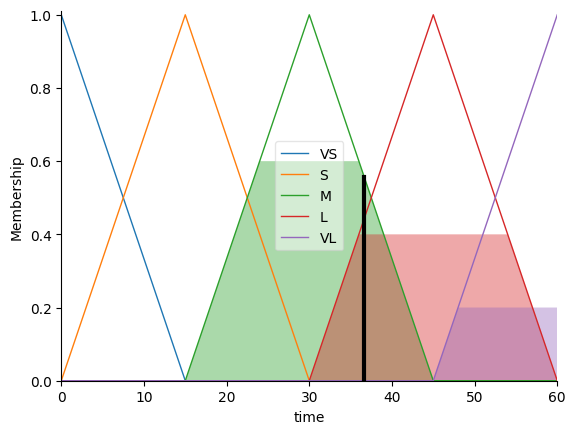

In [ ]:
# Pass inputs to the ControlSystem
ctrl_sim.inputs({'dirtiness': 60, 'load': 70})

# Crunch the numbers
ctrl_sim.compute()
print("Washing time:", ctrl_sim.output['time'])
time.view(sim=ctrl_sim)


## Discussions
To solve this problem, once again, the scikit-fuzzy package was used.

For this problem, regarding the inputs, we used a degree of
dirtiness of 60% and a size of load of 70%. So we can say that we used a considerable (mostly) "MD(medium)" range degree of dirtiness as well as both "ML(medium)" and "LL(large)" range size of a load of clothes. Given these inputs, the program outputted a washing time value result of approximately 36.650.

In the next 3 figures above, we can see the membership functions for each linguistic value.

![Figure 11](https://github.com/LeomPina/AIreports/blob/main/plot5.3.3.png?raw=true)

Figure 11

![Figure 12](https://github.com/LeomPina/AIreports/blob/main/plot5.3.4.png?raw=true)

Figure 12

![Figure 13](https://github.com/LeomPina/AIreports/blob/main/plot5.3.5.png?raw=true)

Figure 13

We can notice that the membership functions obtained are defined as expected (in a simple triangular shape).

In the following figure, we can see a plot regarding the washing time, and relative to the fuzzy system computed when running the program.

![Figure 14](https://github.com/LeomPina/AIreports/blob/main/plot5.3.6.png?raw=true)

Figure 14

By analysing the results, we can conclude that the washing time for this project is approximately 36.650 when the degree of dirtiness is 60% and the size of load is 70%, this being a mostly "L(long)" and "VL(very long)" range washing time.

#Conclusion

In conclusion, after completing this Lab work by solving its tasks and problems, we can agree that by using fuzzy systems, we were able to find a solution for these 3 tasks. By doing so, we also studied these 3 classic problems and therefore gained additional knowledge on linguistic variables,
linguistic values, fuzzy membership functions, rules and how these are implemented in a program.

In further investigations, we could study improved and more complex decision-making models, for example, while also using some machine learning and deep learning approaches. On top of that, we could study more complex and nuanced scenarios, in order to generate and explore more precise and adaptable fuzzy systems. Furthermore, we could also try to apply this knowledge to real-world applications or other areas of investigation.